# Simple Linear Regression Neural Network

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

Lets Generate some random numbers using `np.random.uniform(low, high, size)` it will generate random numbers from low to high and size

Here, we choose 2 independent variable so we create 2 np array of size (1000, 1) and combine those 2 variable into one single matrix using `np.column_stack` 

In [2]:
np.random.seed(42)
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


### Create target we aim at

We have to create a Linear model here so we need outputs to train that linear model so we will create a linear equation for the model using our 2 inputs i.e. 

`f(x,z) = 2*x -3*z +5 +noise` Here 2 and 3 is weights and 5 is the bias. Noise is used to randomize the variable in real time data noise will always be there. noise is a scalar value so we generate the noise in the same way of input variable but it should be 1-Dimensional (1000, 1)

In [3]:
noise = np.random.uniform(-1, 1, (observations, 1))

In [4]:
targets = 2*xs -3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Ploting the Data 

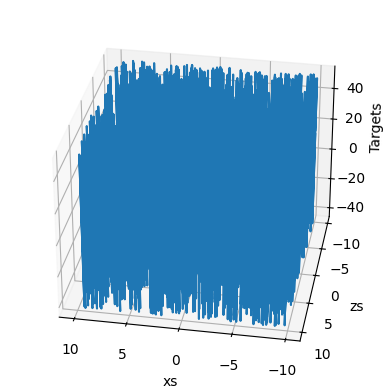

In [5]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initilize Variables

We initiate a random number from -0.1 to 0.1 as bias and weight, usually in gradient descent the weight and bias will start from a arbitrary number but here we choose it from a small random number 

In [6]:
np.random.seed(42)

init_range = 0.1

# Here we have 2 independent variable so 2 weights i.e. size=(2,1)
weights = np.random.uniform(-init_range, init_range, size=(2, 1))

# Here we have only one output so only one constant so 1 bias 
biases = np.random.uniform(-init_range, init_range, size=1)

print(weights, biases)

[[-0.02509198]
 [ 0.09014286]] [0.04639879]


### Set Learning Rate 

We can't fix a constant learning rate for a problem it should ba trail and error

In [7]:
learning_rate = 0.02

### Training the model

- Here we have to take dot product of weights to input and add bias to it since its a Linear Model
- Then we have to find loss function, here we use L-2 loss function which is sum of squared difference between outputs and targets
  - We are using `np.sum` function to sum all loss and divide it by no of observations
- Then the update rule which is Gradient Descent (i.e.) (current weights) minus (learning rate multiplied by dot product of (inputs and deltas)
- Same goes for biases

In [8]:
for i in range(1000):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets

    loss = np.sum(deltas ** 2)/2 /observations
    print(loss)

    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

235.07030025766198
37.04890932319332
14.414105466689142
11.469853727743942
10.75493815641758
10.306219719719506
9.902069173364774
9.516923284438606
9.147344317682796
8.792413426893923
8.451517268032608
8.124097170104813
7.809619987673906
7.507574039842272
7.217467916443829
6.938829637660862
6.671205881520744
6.414161245853476
6.167277539868259
5.930153103784255
5.7024021553618915
5.483654162266364
5.273553239241513
5.0717575691134
4.8779388466814275
4.691781744592399
4.512983400328485
4.341252923474429
4.176310922462441
4.017889050024736
3.8657295666142937
3.7195849210835057
3.5792173479385143
3.4443984805140198
3.3149089794392355
3.1905381757904987
3.0710837283500156
2.956351294413087
2.846154213608288
2.7403132042161658
2.6386560714924148
2.541017427520985
2.447238422141342
2.357166484512134
2.2706550748907977
2.187563446225268
2.1077564151699417
2.0311041421533194
1.957481920139554
1.8867699717402047
1.8188532543461364
1.7536212729625185
1.6909679004424234
1.6307912048265565
1.57299

In [9]:
print(weights, biases)

[[ 2.00136617]
 [-2.99732794]] [5.00470265]


### Plotting last outputs vs targets

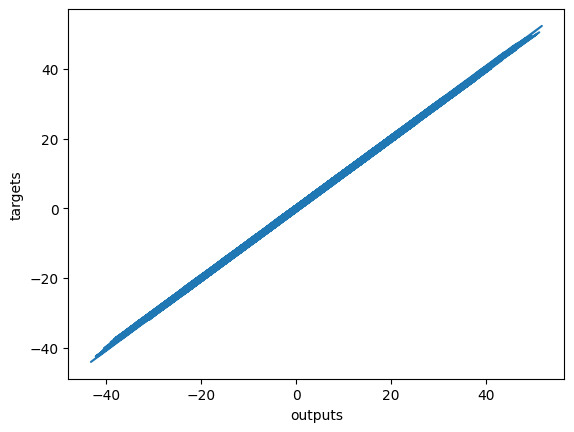

In [10]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show();